# Import library

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, skew
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone

#XGBoost
from xgboost import XGBRegressor

#warnings
import warnings
warnings.filterwarnings('ignore')

# Get the data

In [2]:
df=pd.read_csv('C:\\Users\\natiq\\Desktop\\auto-mpg\\auto-mpg.csv', na_values=['?'])

In [3]:
data=df.copy()

In [4]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [5]:
df.drop('car name', axis=1, inplace=True)

In [6]:
df.shape

(398, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 25.0 KB


In [8]:
df['origin'] = df['origin'].replace([1, 2, 3], ['USA', 'Europe', 'Japan'])

In [9]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,USA
1,15.0,8,350.0,165.0,3693,11.5,70,USA
2,18.0,8,318.0,150.0,3436,11.0,70,USA
3,16.0,8,304.0,150.0,3433,12.0,70,USA
4,17.0,8,302.0,140.0,3449,10.5,70,USA


In [10]:
df['origin'].value_counts()

USA       249
Japan      79
Europe     70
Name: origin, dtype: int64

In [11]:
df['origin'].value_counts(normalize=True)

USA       0.625628
Japan     0.198492
Europe    0.175879
Name: origin, dtype: float64

In [12]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model year       13
origin            3
dtype: int64

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,392.0,104.469388,38.491160,46.0,75.000,93.5,126.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0


# Missing Values

In [14]:
#The dataset contains a few unknown values.
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [15]:
df.isnull().sum().sum()/df.shape[0]

0.01507537688442211

In [16]:
df.isnull().sum()/df.shape[0]

mpg             0.000000
cylinders       0.000000
displacement    0.000000
horsepower      0.015075
weight          0.000000
acceleration    0.000000
model year      0.000000
origin          0.000000
dtype: float64

In [17]:
df.dropna(axis=0, inplace=True)

In [18]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

# Exploratory Data Analysis

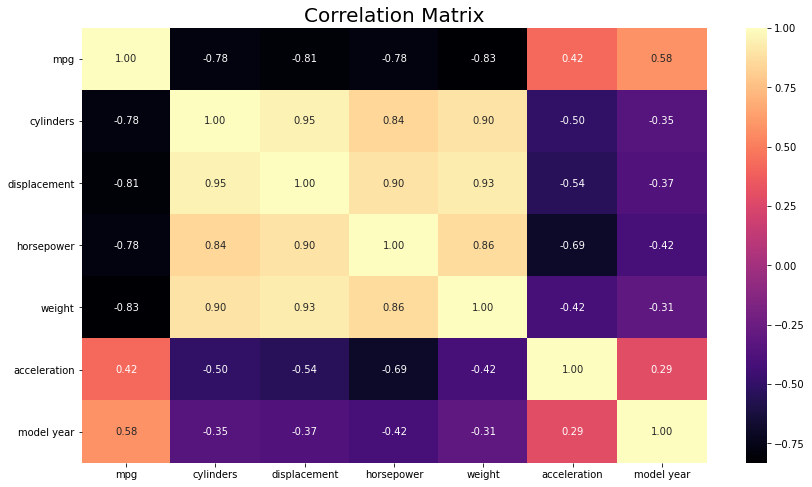

In [19]:
#Correlation
f, ax = plt.subplots(figsize= [14, 8])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

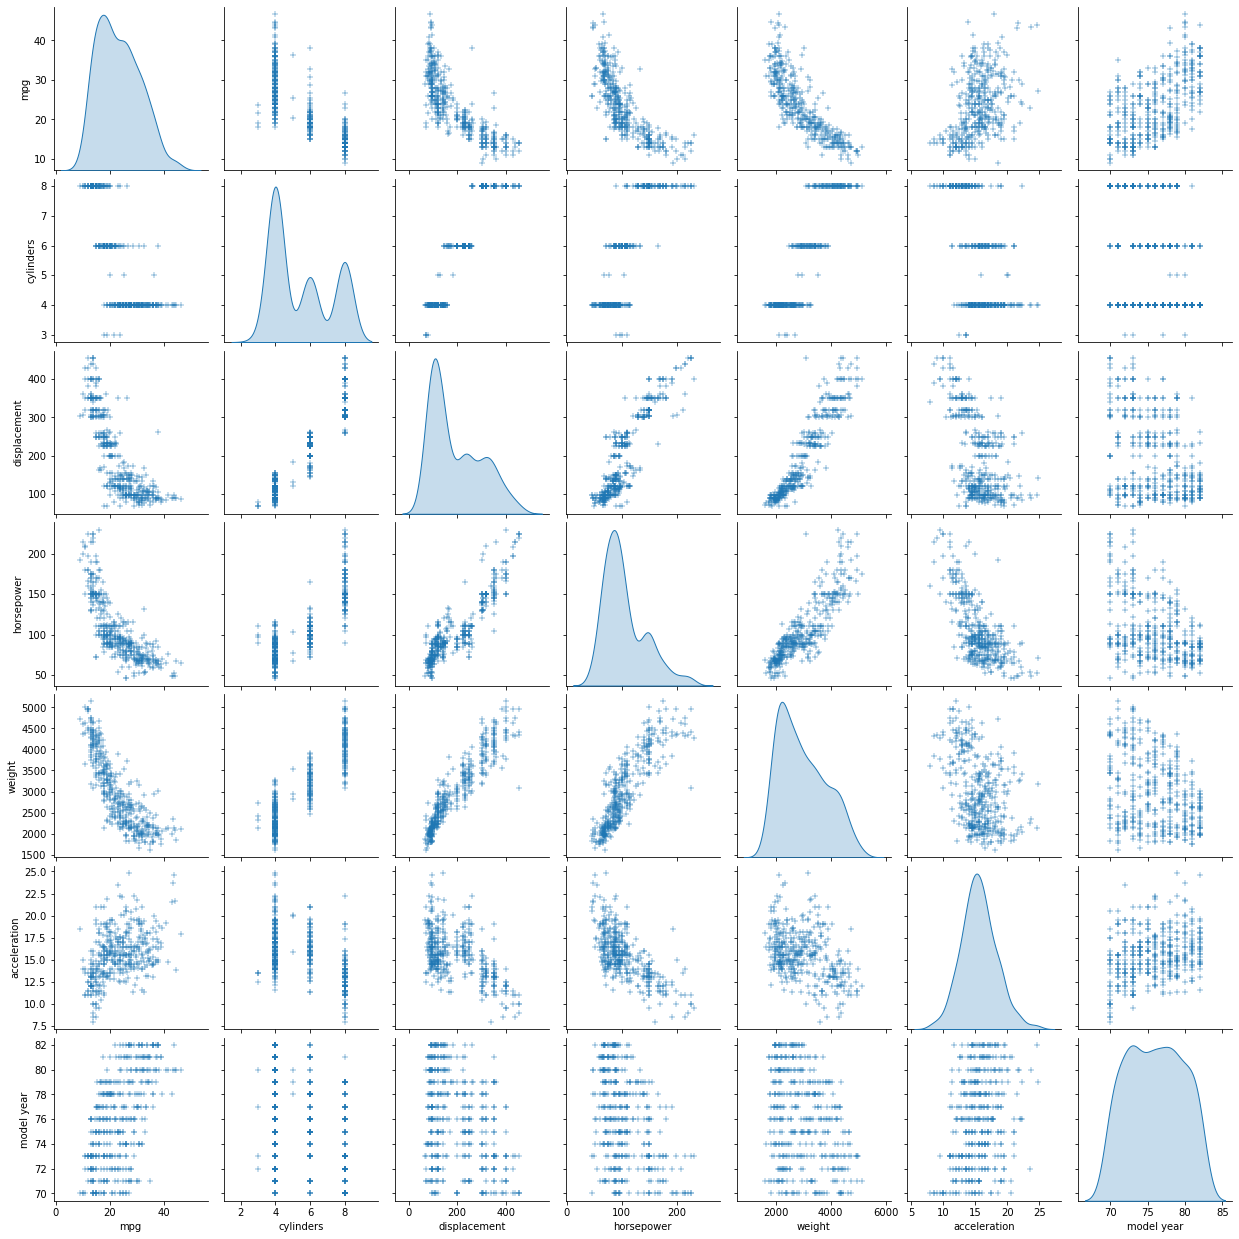

In [20]:
sns.pairplot(df, diag_kind='kde', markers='+')

<AxesSubplot:>

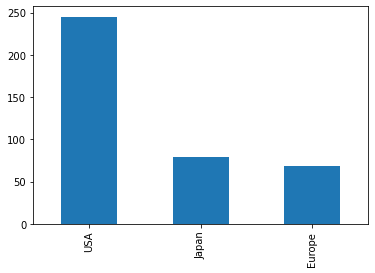

In [21]:
df['origin'].value_counts().plot.bar()

Text(0.5, 1.0, 'Origin Distribution')

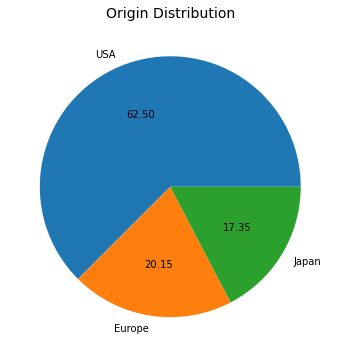

In [22]:
plt.figure(figsize=[14, 6])
plt.pie(x=df['origin'].value_counts(), autopct="%.2f", labels=['USA', 'Europe', 'Japan'])
plt.title("Origin Distribution", fontsize=14)

<AxesSubplot:xlabel='origin', ylabel='mpg'>

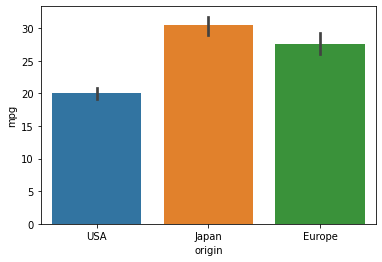

In [23]:
sns.barplot(x='origin', y='mpg', data=df)

Text(0.5, 1.0, 'Consumption Gallon by Years')

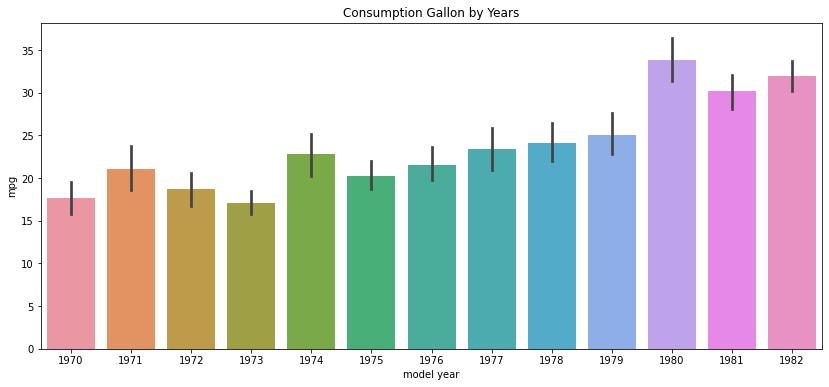

In [24]:
plt.figure(figsize=[14, 6])
sns.barplot(x=df['model year']+1900, y=df['mpg'])
plt.title('Consumption Gallon by Years')

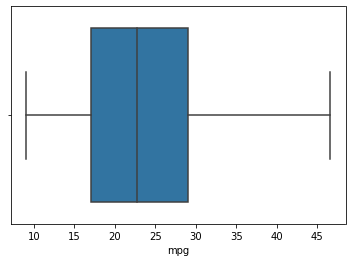

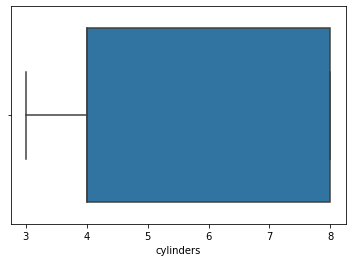

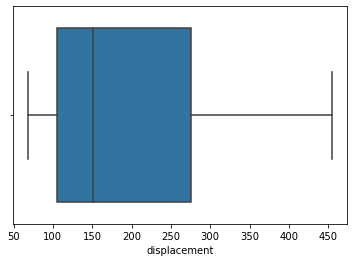

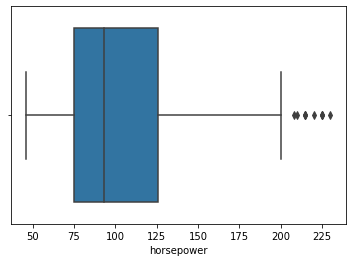

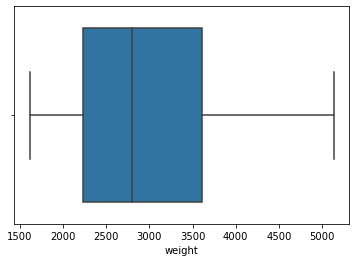

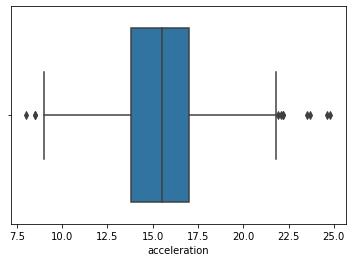

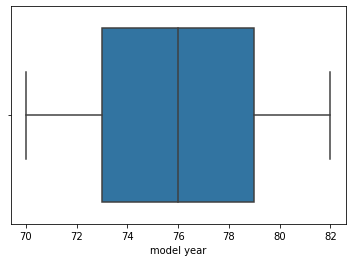

In [25]:
#Boxplot
for col in df._get_numeric_data().columns:       
    plt.figure()
    sns.boxplot(df[col])

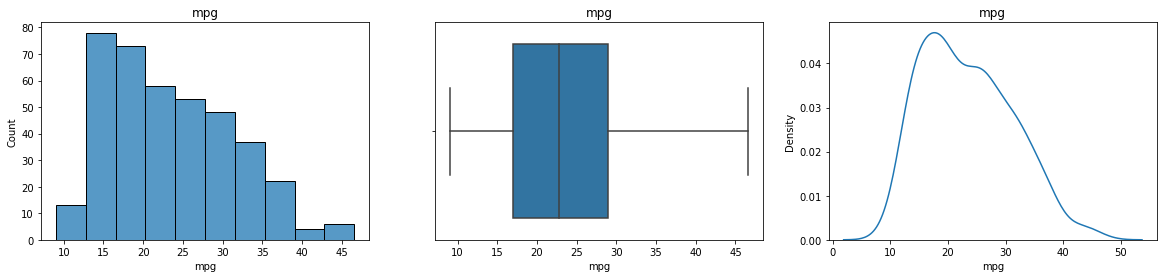

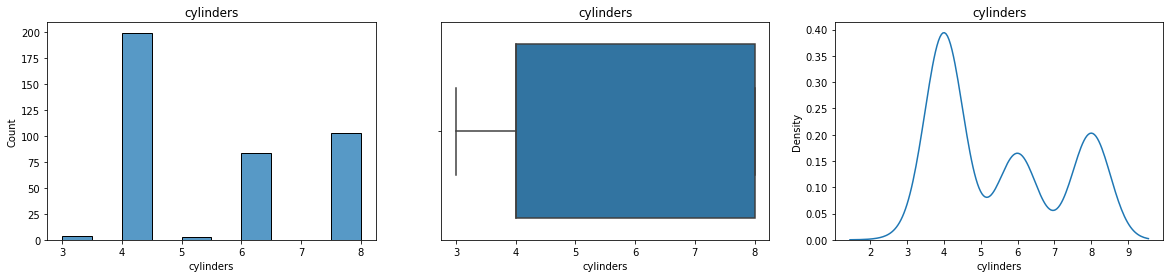

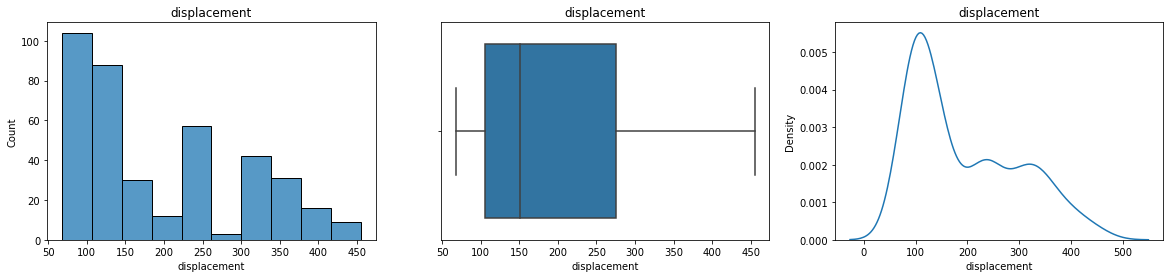

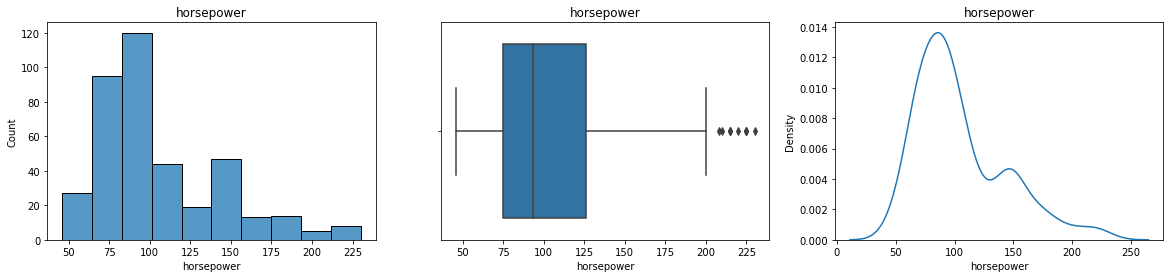

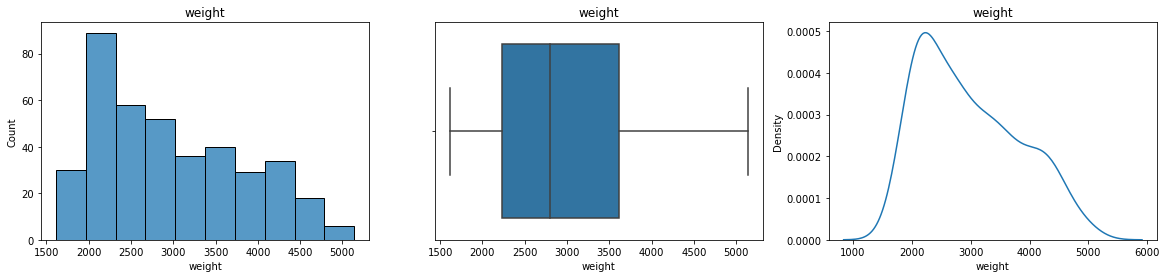

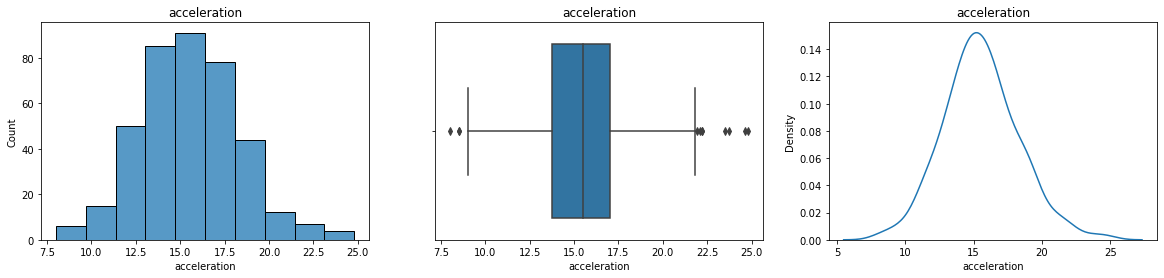

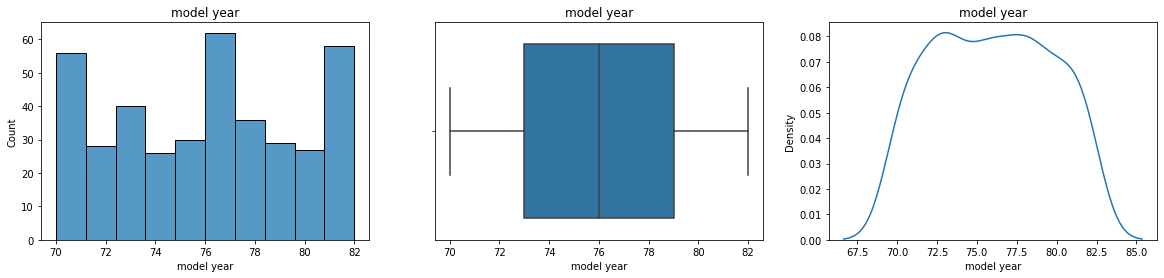

In [26]:
for i in df._get_numeric_data().columns:
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 4))
    sns.histplot(df[i], bins=10, ax=axes[0])
    axes[0].set_title(i)
    
    sns.boxplot(df[i], ax=axes[1])
    axes[1].set_title(i)
   
    sns.kdeplot(df[i], ax=axes[2])
    axes[2].set_title(i)
    plt.show()

In [27]:
#Outliers
def outlier(df, column):
    Q1=df[column].quantile(0.00)
    Q3=df[column].quantile(0.95)
    IQR_hp=Q3-Q1
    top_limit=Q3+ 1.5*IQR_hp
    bottom_limit=Q1- 1.5*IQR_hp
    return df[ (df[column]>=bottom_limit) & (df[column]<=top_limit) ]

In [28]:
df=outlier(df, 'horsepower')
df=outlier(df, 'acceleration')

# Feature Engineering

<AxesSubplot:xlabel='mpg', ylabel='Density'>

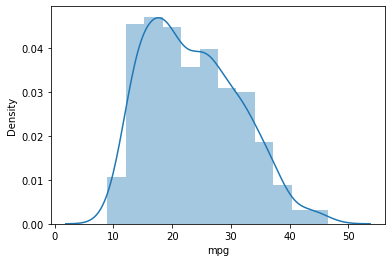

In [29]:
#Skewness
#feature- dependent variable
sns.distplot(df['mpg'])

<AxesSubplot:xlabel='mpg', ylabel='Density'>

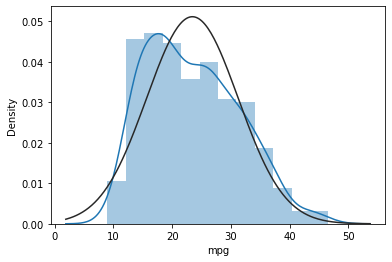

In [30]:
sns.distplot(df['mpg'], fit=norm)

In [31]:
(mu, sigma)=norm.fit(df['mpg'])
print(mu, sigma)

23.445918367346938 7.795045762682584


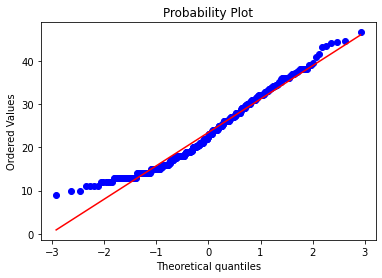

In [32]:
#qq plot
fig=plt.figure()
stats.probplot(df['mpg'], plot=plt)
plt.show()

In [33]:
df['mpg']=np.log1p(df['mpg'])

<AxesSubplot:xlabel='mpg', ylabel='Density'>

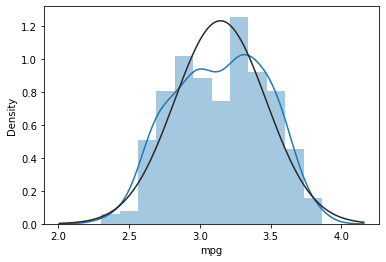

In [34]:
sns.distplot(df['mpg'], fit=norm)

In [35]:
(mu, sigma)=norm.fit(df['mpg'])
print(mu, sigma)

3.14490227671331 0.3240873294020875


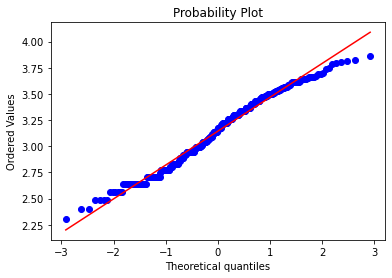

In [36]:
fig=plt.figure()
stats.probplot(df['mpg'], plot=plt)
plt.show()

In [37]:
#feature- independent variable
skewed_feats=df.drop('origin', axis=1).apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness=pd.DataFrame(skewed_feats, columns=['skewned'])
#Box Cox Transformation lazim olsa skew ucun

In [38]:
skewness

,skewned
horsepower,1.083161
displacement,0.698981
weight,0.517595
cylinders,0.506163
acceleration,0.290470
model year,0.019613
mpg,-0.103866


# One Hot encoding

In [39]:
df['cylinders']=df['cylinders'].astype(str)

In [40]:
df=pd.get_dummies(df)

In [41]:
df.head()

,mpg,displacement,horsepower,weight,acceleration,model year,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,origin_Europe,origin_Japan,origin_USA
0,2.944439,307.0,130.0,3504,12.0,70,0,0,0,0,1,0,0,1
1,2.772589,350.0,165.0,3693,11.5,70,0,0,0,0,1,0,0,1
2,2.944439,318.0,150.0,3436,11.0,70,0,0,0,0,1,0,0,1
3,2.833213,304.0,150.0,3433,12.0,70,0,0,0,0,1,0,0,1
4,2.890372,302.0,140.0,3449,10.5,70,0,0,0,0,1,0,0,1


In [42]:
#Split and stand
X=df.drop(['mpg'], axis=1)
Y=df['mpg']
scaler=StandardScaler() #RobustScaler
#RobustScaler()-outlier-lari veriden uzaklasdirir
#mean=0, std=1
X=scaler.fit_transform(X)

# Model

In [43]:
def train_show_results(X, Y, model, split_share=0.3):
    print(f"Training using {model}")
    X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=split_share)
    m=model.fit(X_train, Y_train)
    preds=m.predict(X_test)
    mse=mean_squared_error(Y_test, preds)
    print(f"MSE: {mse}")
    print("###########################")

In [44]:
models=[LinearRegression(), Ridge(), Lasso(), ElasticNet(), XGBRegressor(), 
        XGBRegressor(objective='reg:linear', max_depth=5, min_child_weight=4, subsample=0.7, n_estimators=100, learning_rate=0.7)]
for model in models:
    train_show_results(X, Y, model)

Training using LinearRegression()
MSE: 0.014222894611802398
###########################
Training using Ridge()
MSE: 0.015525441221159378
###########################
Training using Lasso()
MSE: 0.11451097194606583
###########################
Training using ElasticNet()
MSE: 0.09754704053652766
###########################
Training using XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None)
MSE: 0.011187969407076417
##############

# Model tuning

In [45]:
def model_tuning(X, Y, model, tuned_params, split_share=0.3, n_folds=5, slogx=True):
    #print(f"Training using {model} with {tuned_params}")
    X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=split_share)
    clf=GridSearchCV(model, tuned_params, cv=n_folds,
                 scoring='neg_mean_squared_error', n_jobs=5)
    clf.fit(X_train, Y_train)
    scores=clf.cv_results_['mean_test_score']
    #scores_std=clf.cv_results_['std_test_score']
    #print(clf.best_estimator_)
    best_model=clf.best_estimator_
    best_model.fit(X_train, Y_train)
    Y_pred=best_model.predict(X_test)
    mse=mean_squared_error(Y_test, Y_pred)
    print(f"MSE: {mse}")
    if slogx:  
        plt.semilogx(tuned_params['alpha'], scores)

MSE: 0.009523734220903838


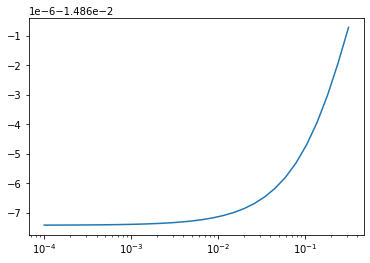

In [46]:
#Ridge- over onluyur, varyansi azaldir
alphas=np.logspace(-4, -0.5, 30)
tuned_params={'alpha':alphas}
model_tuning(X, Y, Ridge(random_state=42, max_iter=10000), tuned_params)

MSE: 0.012663735810375573


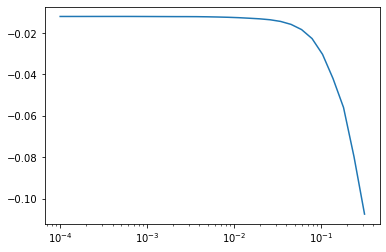

In [47]:
#katsayi dusuk olanlari 0 edir
#Lasso-Feature selection
#high corr varsa birini saxlayir, digerleri 0 olur
#bir az bias olur/ amma var azalir
alphas=np.logspace(-4, -0.5, 30)
tuned_params={'alpha':alphas}
model_tuning(X, Y, Lasso(random_state=42, max_iter=10000), tuned_params)

In [48]:
#ElasticNet
#High corr-da azalma ve cixarma edir
alphas=np.logspace(-4, -0.5, 30)
eNet=ElasticNet(random_state=42, max_iter=10000)
tuned_params={'alpha':alphas, 'l1_ratio':np.arange(0.0, 1.0, 0.05)}
model_tuning(X, Y, ElasticNet(random_state=42, max_iter=10000), tuned_params, slogx=False)

MSE: 0.012616773828420053


In [49]:
params={'nthread':[4],
        'objective':['reg:linear'],
        'learning_rate':[.03, 0.05, .07],
        'max_depth':[5, 6, 7],
        'min_child_weight':[4],
        'silent':[1],
        'subsample':[0.7],
        'colsample_bytree':[0.7],
        'n_estimators':[500, 1000]
        }

model_xgb=XGBRegressor()
model_tuning(X, Y, model_xgb, params, slogx=False)

[13:57:17] WARNING: d:\bld\xgboost-split_1619725139497\work\src\objective\regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[13:57:17] WARNING: ..\src\learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:57:17] WARNING: d:\bld\xgboost-split_1619725139497\work\src\objective\regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[13:57:17] WARNING: ..\src\learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


MSE: 0.013817168687014197


I could say our model did ok with the small data we have!
Thank you for checking out my work!